In [1]:
# SH test
include("MDBM__types.jl")
using Plots
gr()

Plots.GRBackend()

In [14]:
function f(a,b)
    a^2.0+b^2.0-2.0^2.0
end
function c(a,b)
    a-b
end

ax1=Axis([-5,-2.5,0,2.5,5],"a")
ax2=Axis(-5:5.0,"b")

mymdbm=MDBM_Problem(f,[ax1,ax2],constraint=c)
interpolate!(mymdbm,interpolationorder=1)

  0.000171 seconds (391 allocations: 28.281 KiB)
  0.000313 seconds (1.70 k allocations: 65.578 KiB)
------
  0.000195 seconds (720 allocations: 54.672 KiB)
  0.000326 seconds (2.86 k allocations: 102.672 KiB)
------
  0.000475 seconds (1.16 k allocations: 92.266 KiB)
  0.001079 seconds (4.53 k allocations: 170.609 KiB)
------
+++++++++++++


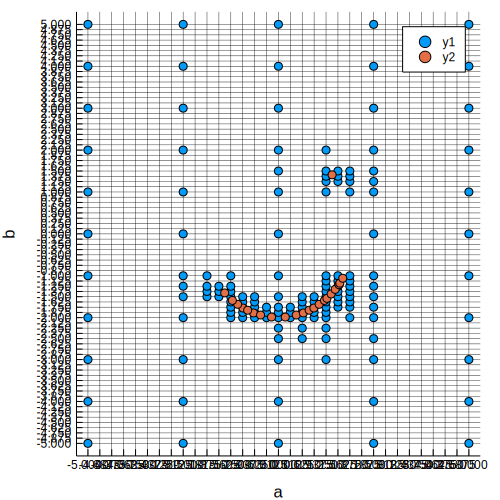

In [15]:
for k=1:3
    @time refine!(mymdbm)
    @time interpolate!(mymdbm,interpolationorder=1)
    println("------")
end
println("+++++++++++++")

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval)

#solution points
a_sol,b_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,xlabel = ax1.name,ylabel = ax2.name,size = (500, 500),
     xticks = mymdbm.axes[1].ticks , yticks = mymdbm.axes[2].ticks, gridalpha=0.8)

  0.003043 seconds (12.57 k allocations: 1.267 MiB)
  0.001063 seconds (5.11 k allocations: 188.438 KiB)


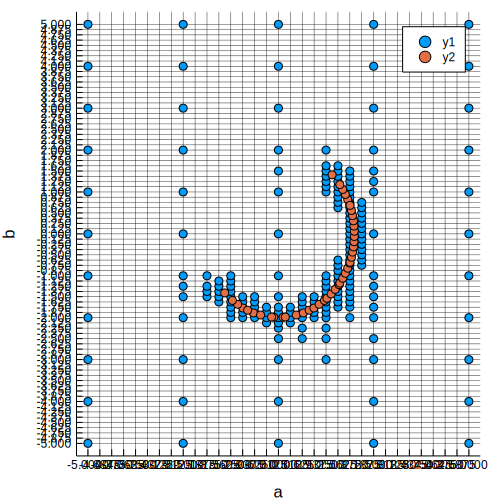

In [16]:
@time checkneighbour!(mymdbm)
@time interpolate!(mymdbm,interpolationorder=1)

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval)

#solution points
a_sol,b_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,xlabel = ax1.name,ylabel = ax2.name,size = (500, 500),
     xticks = mymdbm.axes[1].ticks , yticks = mymdbm.axes[2].ticks, gridalpha=0.8)


In [17]:
println(mymdbm.fc.memoryacc[1])
println(length(mymdbm.fc.fvalarg))

827
197


  0.050944 seconds (81.85 k allocations: 4.746 MiB)
  0.018340 seconds (55.63 k allocations: 2.227 MiB, 50.03% gc time)
------
  0.021960 seconds (84.84 k allocations: 7.012 MiB)
  0.033637 seconds (245.09 k allocations: 9.790 MiB)
------
  0.966584 seconds (2.40 M allocations: 145.423 MiB, 4.70% gc time)
  0.014182 seconds (115.84 k allocations: 4.474 MiB)
+++++++++++++


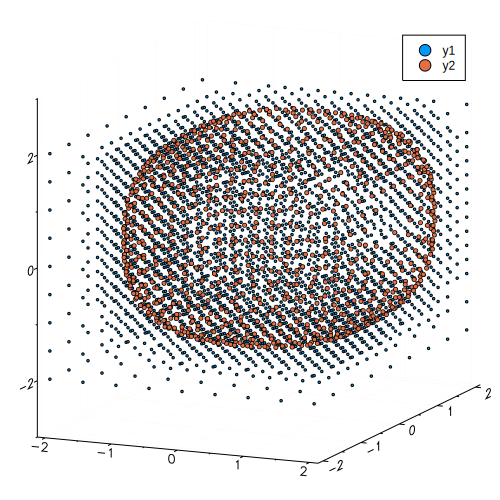

In [18]:
using LinearAlgebra
mymdbm=MDBM_Problem((x...)->norm([x...] .- 0.2,2.7)-1.9,[-2:2,-2:2,-2:2])

interpolate!(mymdbm,interpolationorder=1)
for k=1:2
    @time refine!(mymdbm)
    @time interpolate!(mymdbm,interpolationorder=1)
    println("------")
end
@time checkneighbour!(mymdbm)
@time interpolate!(mymdbm,interpolationorder=1)
println("+++++++++++++")

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
c_eval=[x.callargs[3] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval,c_eval,markersize=1)

#solution points
a_sol,b_sol,c_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,c_sol,size = (500, 500),markersize=2)

+++++++++++++


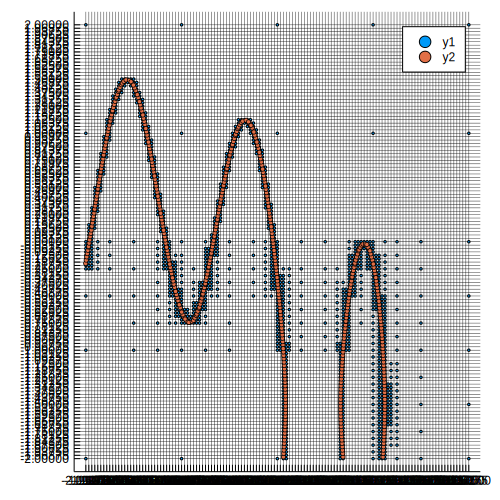

In [43]:
using LinearAlgebra
mymdbm=MDBM_Problem((x...)->norm([x...].+ 1.5,1.7)+sin(x[1]*5)-2.0,[-2:2,-2:2])

interpolate!(mymdbm,interpolationorder=1)
for k=1:5
    refine!(mymdbm)
    interpolate!(mymdbm,interpolationorder=1)
end
checkneighbour!(mymdbm)
interpolate!(mymdbm,interpolationorder=1)
println("+++++++++++++")

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval,markersize=1)

#solution points
a_sol,b_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,size = (500, 500),markersize=2,
     xticks = mymdbm.axes[1].ticks , yticks = mymdbm.axes[2].ticks, gridalpha=0.8)

In [44]:
# # extension with the same resolution:
# axesextend!(mymdbm,1,prepend=mymdbm.axes[1].ticks[1:end-1] .+(mymdbm.axes[1].ticks[1]- mymdbm.axes[1].ticks[end]));
# axesextend!(mymdbm,2,prepend=mymdbm.axes[2].ticks[1:end-1] .+(mymdbm.axes[2].ticks[1]- mymdbm.axes[2].ticks[end]));

#extension with different reselution
axesextend!(mymdbm,1,prepend=-6.2:0.2:-2.2);
axesextend!(mymdbm,2,prepend=-6.2:0.1:-2.2,append=2.2:0.2:3);

+++++++++++++


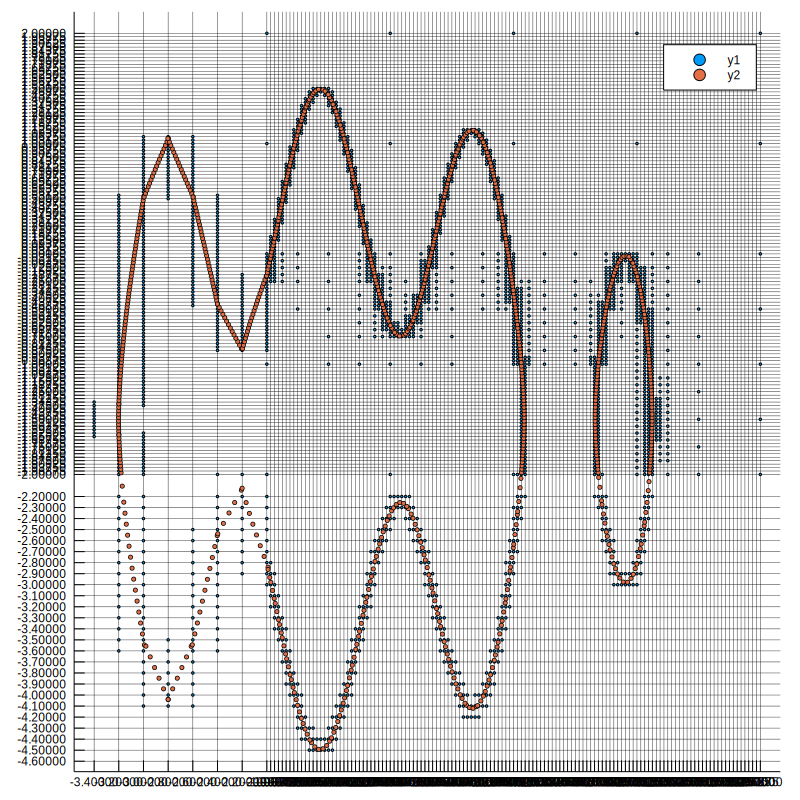

In [41]:
checkneighbour!(mymdbm)
interpolate!(mymdbm,interpolationorder=1)
println("+++++++++++++")

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval,markersize=1)

#solution points
a_sol,b_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,size = (800, 800),markersize=2,
     xticks = mymdbm.axes[1].ticks , yticks = mymdbm.axes[2].ticks, gridalpha=0.8)

In [42]:
for k=1:2
    refine!(mymdbm)
    interpolate!(mymdbm,interpolationorder=1)
end
checkneighbour!(mymdbm)
interpolate!(mymdbm,interpolationorder=1)
println("+++++++++++++")

#evaluated points
a_eval=[x.callargs[1] for x in mymdbm.fc.fvalarg]
b_eval=[x.callargs[2] for x in mymdbm.fc.fvalarg]
scatter(a_eval,b_eval,markersize=1)

#solution points
a_sol,b_sol=getinterpolatedpoint(mymdbm)
scatter!(a_sol,b_sol,size = (800, 800),markersize=2,
 xticks = mymdbm.axes[1].ticks , yticks = mymdbm.axes[2].ticks, gridalpha=0.8)

+++++++++++++
